# Decision Tree Classification

## Lab Assignment - Iris Flower Classification

This exercise is understanding the decision tree classifier over the IRIS data set. 

Perform the following operations:

#### 1. Plot a scatter of all feature columns. Note which of them are highly correlated. Consider those feature columns only.

#### 2. The flower column of the data is a string denoting the flower. Convert Iris-setosa, Iris-versicolor and Iris-virginica to numbers 0, 1, 2 respectively with a lambda method and apply method of pandas. 

#### 3. Split your dataset into training and testing. There should be 40 samples of each flower in the training dataset, and 10 of each in the testing dataset. Apply a decision tree classifier over the training dataset, with entropy gain.

#### 4. Find the following for depth of the tree varying from 2 to 4:
- The decision tree, Confusion Matrix.  
- What do you observe as your depth increases? Compare the decision tree & accuracy of each model using confusion matrix.

#### 5. Plot a contourf plot with 2 features to visualize the flower classification.

**BONUS Question - 0.5 mark**

#### 6. Obtain the training and testing split with the train_test_split function with 80:20 split and random state 9032. Obtain the decision tree with depth 3. How does this model fare with the previous model? Give answers.
**BONUS Question - 1 mark**

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [10]:
cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'flower']
df = pd.read_csv('iris.data.txt', header=None, names=cols)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# 1. Plot a scatter of all feature columns. Note which of them are highly correlated. Consider those feature columns only.


In [21]:
df['flower'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [22]:
setosa=df[df['flower']=='Iris-setosa']
versicolor=df[df['flower']=='Iris-versicolor']
virginica=df[df['flower']=='Iris-virginica']

In [23]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'flower'], dtype='object')

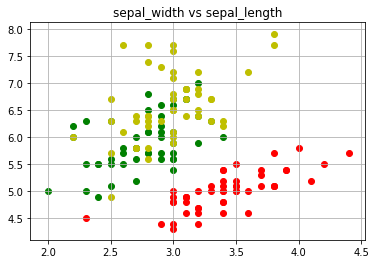

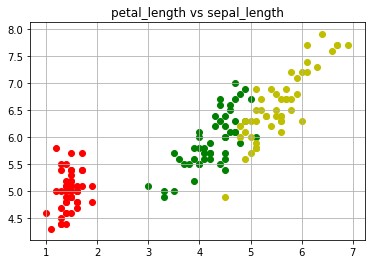

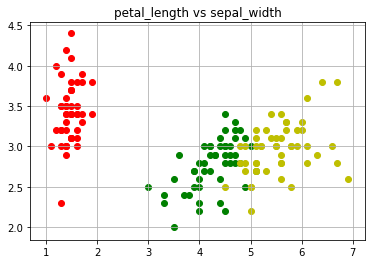

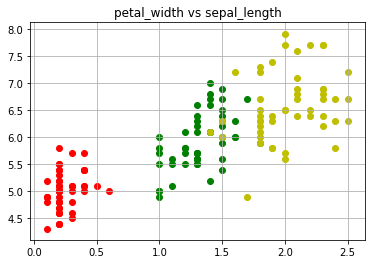

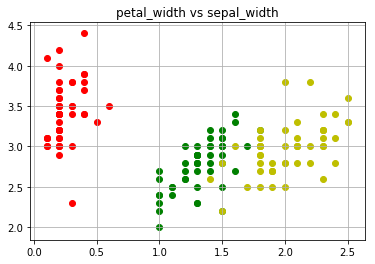

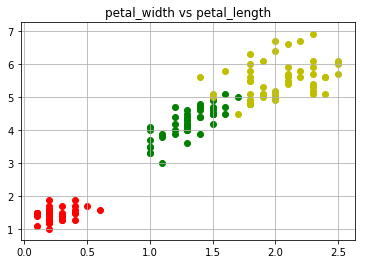

<Figure size 432x288 with 0 Axes>

In [31]:
for i in range(4):
    for j in range(i+1):
#         print(i,j)
          if i!=j:
            plt.scatter(setosa[df.columns[i]],setosa[df.columns[j]],color='r',label="Setosa")
            plt.scatter(versicolor[df.columns[i]],versicolor[df.columns[j]],color='g',label="Versicolor")
            plt.scatter(virginica[df.columns[i]],virginica[df.columns[j]],color='y',label="Virginica")
            plt.title("{0} vs {1}".format(df.columns[i],df.columns[j]))
            plt.grid(True)
            plt.show()
            plt.tight_layout()
          

In [32]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


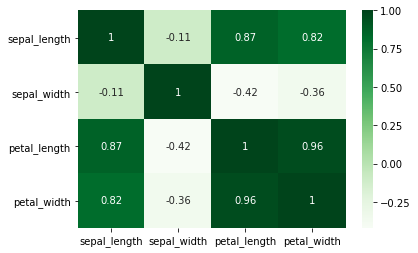

In [36]:
import seaborn as sb
sb.heatmap(df.corr(),annot=True,cmap = 'Greens')

# 2. The flower column of the data is a string denoting the flower. Convert Iris-setosa, Iris-versicolor and Iris-virginica to numbers 0, 1, 2 respectively with a lambda method and apply method of pandas. 


In [57]:
flowers=list(df['flower'].unique())
num=list(range(len('flowers')))
print(num)
print(flowers)
mapping=dict(zip(flowers,num))
print(mapping)
df['flower_index']=df["flower"].apply(lambda x:mapping[x])
df.head()


# mapping={'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}
# df['flower_index']=df['flower'].apply(lambda x:mapping[x])
# df

[0, 1, 2, 3, 4, 5, 6]
['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
{'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}


,sepal_length,sepal_width,petal_length,petal_width,flower,flower_index
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [58]:
setosa=df[df['flower']=='Iris-setosa']
versicolor=df[df['flower']=='Iris-versicolor']
virginica=df[df['flower']=='Iris-virginica']


# 3. Split your dataset into training and testing. There should be 40 samples of each flower in the training dataset, and 10 of each in the testing dataset. Apply a decision tree classifier over the training dataset, with entropy gain.


In [127]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(setosa[['petal_length','petal_width']],setosa['flower_index'],\
                                                                       test_size=0.2)
a_train,a_test,b_train,b_test=train_test_split(versicolor[['petal_length','petal_width']],versicolor['flower_index'],\
                                                                                       test_size=0.2)
p_train,p_test,q_train,q_test=train_test_split(virginica[['petal_length','petal_width']],virginica['flower_index'],test_size=0.2)

ex_train=pd.concat([x_train,a_train,p_train])
rx_test=pd.concat([x_test,a_test,p_test])
ey_train=pd.concat([y_train,b_train,q_train])
ry_test=pd.concat([y_test,b_test,q_test])

# 4. Find the following for depth of the tree varying from 2 to 4:
- The decision tree, Confusion Matrix.  
- What do you observe as your depth increases? Compare the decision tree & accuracy of each model using confusion matrix.

In [148]:
from sklearn.tree import DecisionTreeClassifier
decisiontree = DecisionTreeClassifier(criterion ='entropy', max_depth =4)
obtained_tree= decisiontree.fit(ex_train,ey_train)
print("Extracted Classes",decisiontree.classes_)


Extracted Classes [0 1 2]


In [149]:
#predicted output
predictions= obtained_tree.predict(df[['petal_length','petal_width']])
# print(predictions.tolist())

#actual output
# print(y_test.tolist())

In [150]:
print(confusion_matrix(df['flower_index'],predictions))

[[50  0  0]
 [ 0 49  1]
 [ 0  1 49]]


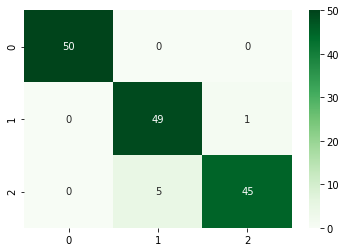

In [140]:
import seaborn
seaborn.heatmap(confusion_matrix(df['flower_index'],predictions),annot=True,cmap='Greens',
               xticklabels=decisiontree.classes_,
               yticklabels=decisiontree.classes_)

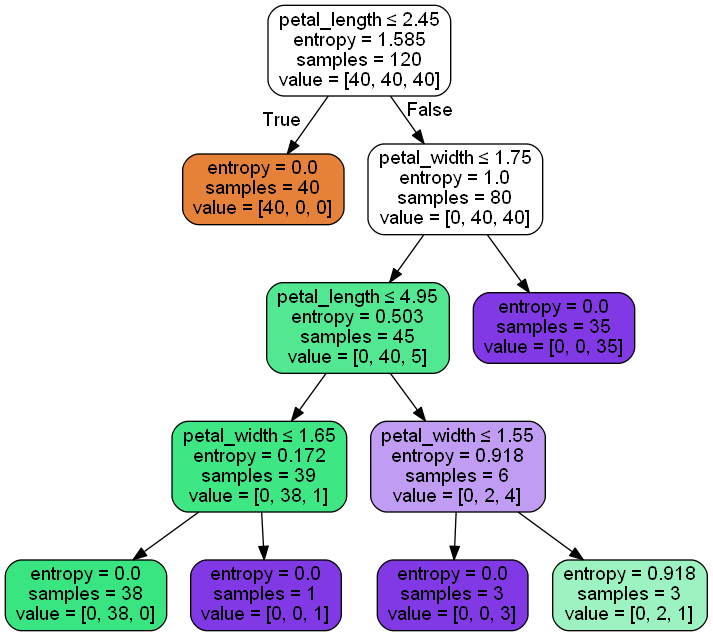

In [151]:
from io import StringIO
import os
os.environ['PATH']+=os.pathsep + 'C:\\Program Files (x86)\\Graphviz2.38\\bin' 

from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
 
DecisionTreeImg = StringIO()
export_graphviz(obtained_tree,out_file=DecisionTreeImg,
               filled=True,rounded=True,
               feature_names=["petal_length","petal_width"],
               special_characters= True)

graph= pydotplus.graph_from_dot_data(DecisionTreeImg.getvalue())
Image(graph.create_png())

In [156]:
from sklearn.metrics import classification_report

print(classification_report('flower_index'))

TypeError: classification_report() missing 1 required positional argument: 'y_pred'

# 5. Plot a contourf plot with 2 features to visualize the flower classification.


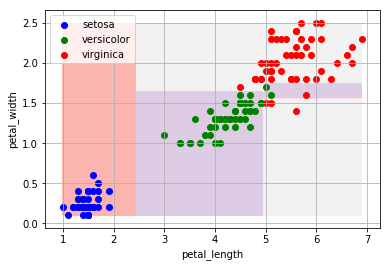

In [179]:
import numpy as np

y_min,y_max = df['petal_width'].min(),df['petal_width'].max()
x_min,x_max = df['petal_length'].min(),df['petal_length'].max()

xx,yy = np.meshgrid(np.arange(x_min,x_max,0.01),
                    np.arange(y_min,y_max,0.01))

# print(xx)
# print(yy)

xx_lin = xx.ravel()
# print(xx_lin)
yy_lin = yy.ravel()
# print(yy_lin)



pred_input= np.c_[xx_lin,yy_lin]
# print(pred_input)

Z=decisiontree.predict(pred_input)
# print(Z)

Z=Z.reshape(xx.shape)
# print(Z)
#contourf fills the area ,it requires  2d array
plt.contourf(xx,yy,Z, cmap=plt.cm.Pastel1)

plt.scatter(setosa["petal_length"],
        setosa['petal_width'],color='b',
           label='setosa')
plt.scatter(versicolor["petal_length"],
            versicolor['petal_width'],
           color='g',label='versicolor')
plt.scatter(virginica["petal_length"],
            virginica['petal_width'],
           color='r',label='virginica')

plt.xlabel("petal_length")
plt.ylabel("petal_width")
plt.legend()
plt.axis()
plt.grid(True)

# 6. Obtain the training and testing split with the train_test_split function with 80:20 split and random state 9032. Obtain the decision tree with depth 3. How does this model fare with the previous model? Give answers.


In [184]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(setosa[['petal_length','petal_width']],setosa['flower_index'],\
                                                                       test_size=0.2,random_state = 9032)
a_train,a_test,b_train,b_test=train_test_split(versicolor[['petal_length','petal_width']],versicolor['flower_index'],\
                                                                                       test_size=0.2, random_state=9032)
p_train,p_test,q_train,q_test=train_test_split(virginica[['petal_length','petal_width']],virginica['flower_index'],test_size=0.2, random_state = 9032)

ex_train=pd.concat([x_train,a_train,p_train])
rx_test=pd.concat([x_test,a_test,p_test])
ey_train=pd.concat([y_train,b_train,q_train])
ry_test=pd.concat([y_test,b_test,q_test])

In [187]:
from sklearn.tree import DecisionTreeClassifier
decisiontree = DecisionTreeClassifier(criterion ='entropy', max_depth =3)
obtained_tree= decisiontree.fit(ex_train,ey_train)
print("Extracted Classes",decisiontree.classes_)

Extracted Classes [0 1 2]


In [188]:
#predicted output
predictions= obtained_tree.predict(df[['petal_length','petal_width']])
# print(predictions.tolist())

#actual output
# print(y_test.tolist())

In [189]:
print(confusion_matrix(df['flower_index'],predictions))

[[50  0  0]
 [ 0 47  3]
 [ 0  1 49]]


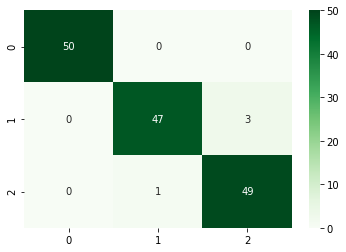

In [191]:
import seaborn
seaborn.heatmap(confusion_matrix(df['flower_index'],predictions),annot=True,cmap='Greens',
               xticklabels=decisiontree.classes_,
               yticklabels=decisiontree.classes_)

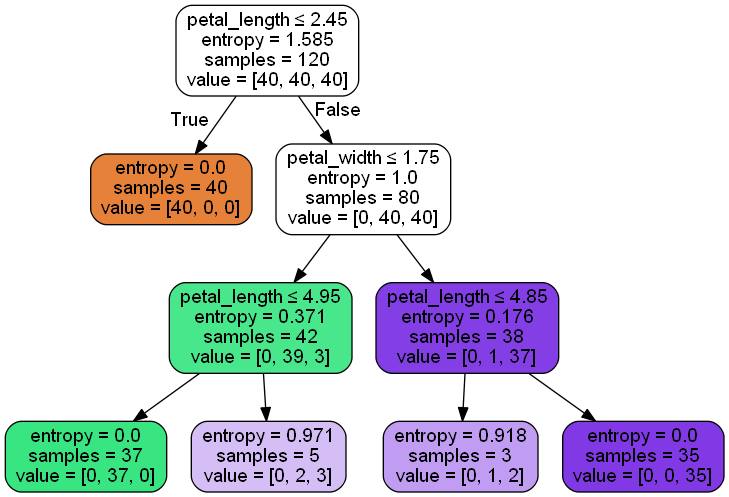

In [192]:
from io import StringIO
import os
os.environ['PATH']+=os.pathsep + 'C:\\Program Files (x86)\\Graphviz2.38\\bin' 

from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
 
DecisionTreeImg = StringIO()
export_graphviz(obtained_tree,out_file=DecisionTreeImg,
               filled=True,rounded=True,
               feature_names=["petal_length","petal_width"],
               special_characters= True)

graph= pydotplus.graph_from_dot_data(DecisionTreeImg.getvalue())
Image(graph.create_png())

In [193]:
print(classification_report(df['flower_index'],predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.94      0.96        50
           2       0.94      0.98      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150

